In [38]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #for splitting the dataset
from sklearn.metrics import confusion_matrix, classification_report #for evaluation of model performance
from sklearn.tree import DecisionTreeClassifier #for decision tree classification algorithm
from sklearn.ensemble import RandomForestClassifier #for random forest classification algorithm
from sklearn.linear_model import LogisticRegression #for logistic regression classification algorithm
from sklearn.naive_bayes import GaussianNB #for naive bayes classification algorithm
from sklearn.cluster import KMeans #for KMeans clustering algorithm

In [2]:
# Load data from CSV files
applicant_df = pd.read_csv("C:/lpu/semester 5/int368 ml/applicant.csv")
loan_df = pd.read_csv("C:/lpu/semester 5/int368 ml/loan.csv")

In [5]:
# Merge data on 'Loan_ID' column
df = pd.merge(applicant_df, loan_df, on='applicant_id', how='inner')

In [6]:
df.head(5) #this is used for showing the top 5 rows and column s of the data

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [7]:
df.info() # this show the details of the data like no of null values in columns and the data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [8]:
df.describe() #It provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset, excluding NaN values.

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


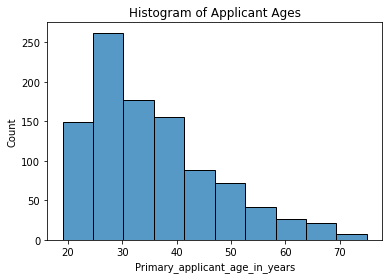

In [12]:
# Plot a histogram of the distribution of ages of primary loan applicants
sns.histplot(df['Primary_applicant_age_in_years'], bins=10)

# Set the title of the plot
plt.title('Histogram of Applicant Ages')

# Display the plot
plt.show()

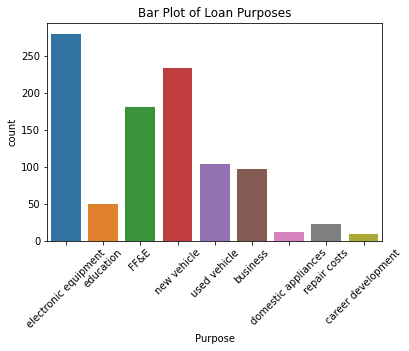

In [13]:
# Create a bar plot of loan purposes
sns.countplot(x='Purpose', data=df)

# Set the title of the plot
plt.title('Bar Plot of Loan Purposes')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

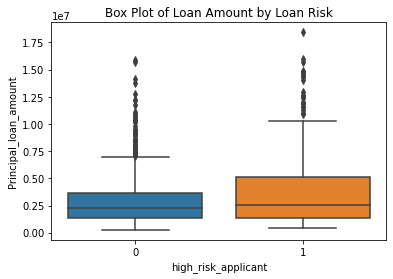

In [14]:
# Create a box plot of loan amount by loan risk
sns.boxplot(x='high_risk_applicant', y='Principal_loan_amount', data=df)

# Set the title of the plot
plt.title('Box Plot of Loan Amount by Loan Risk')

# Display the plot
plt.show()

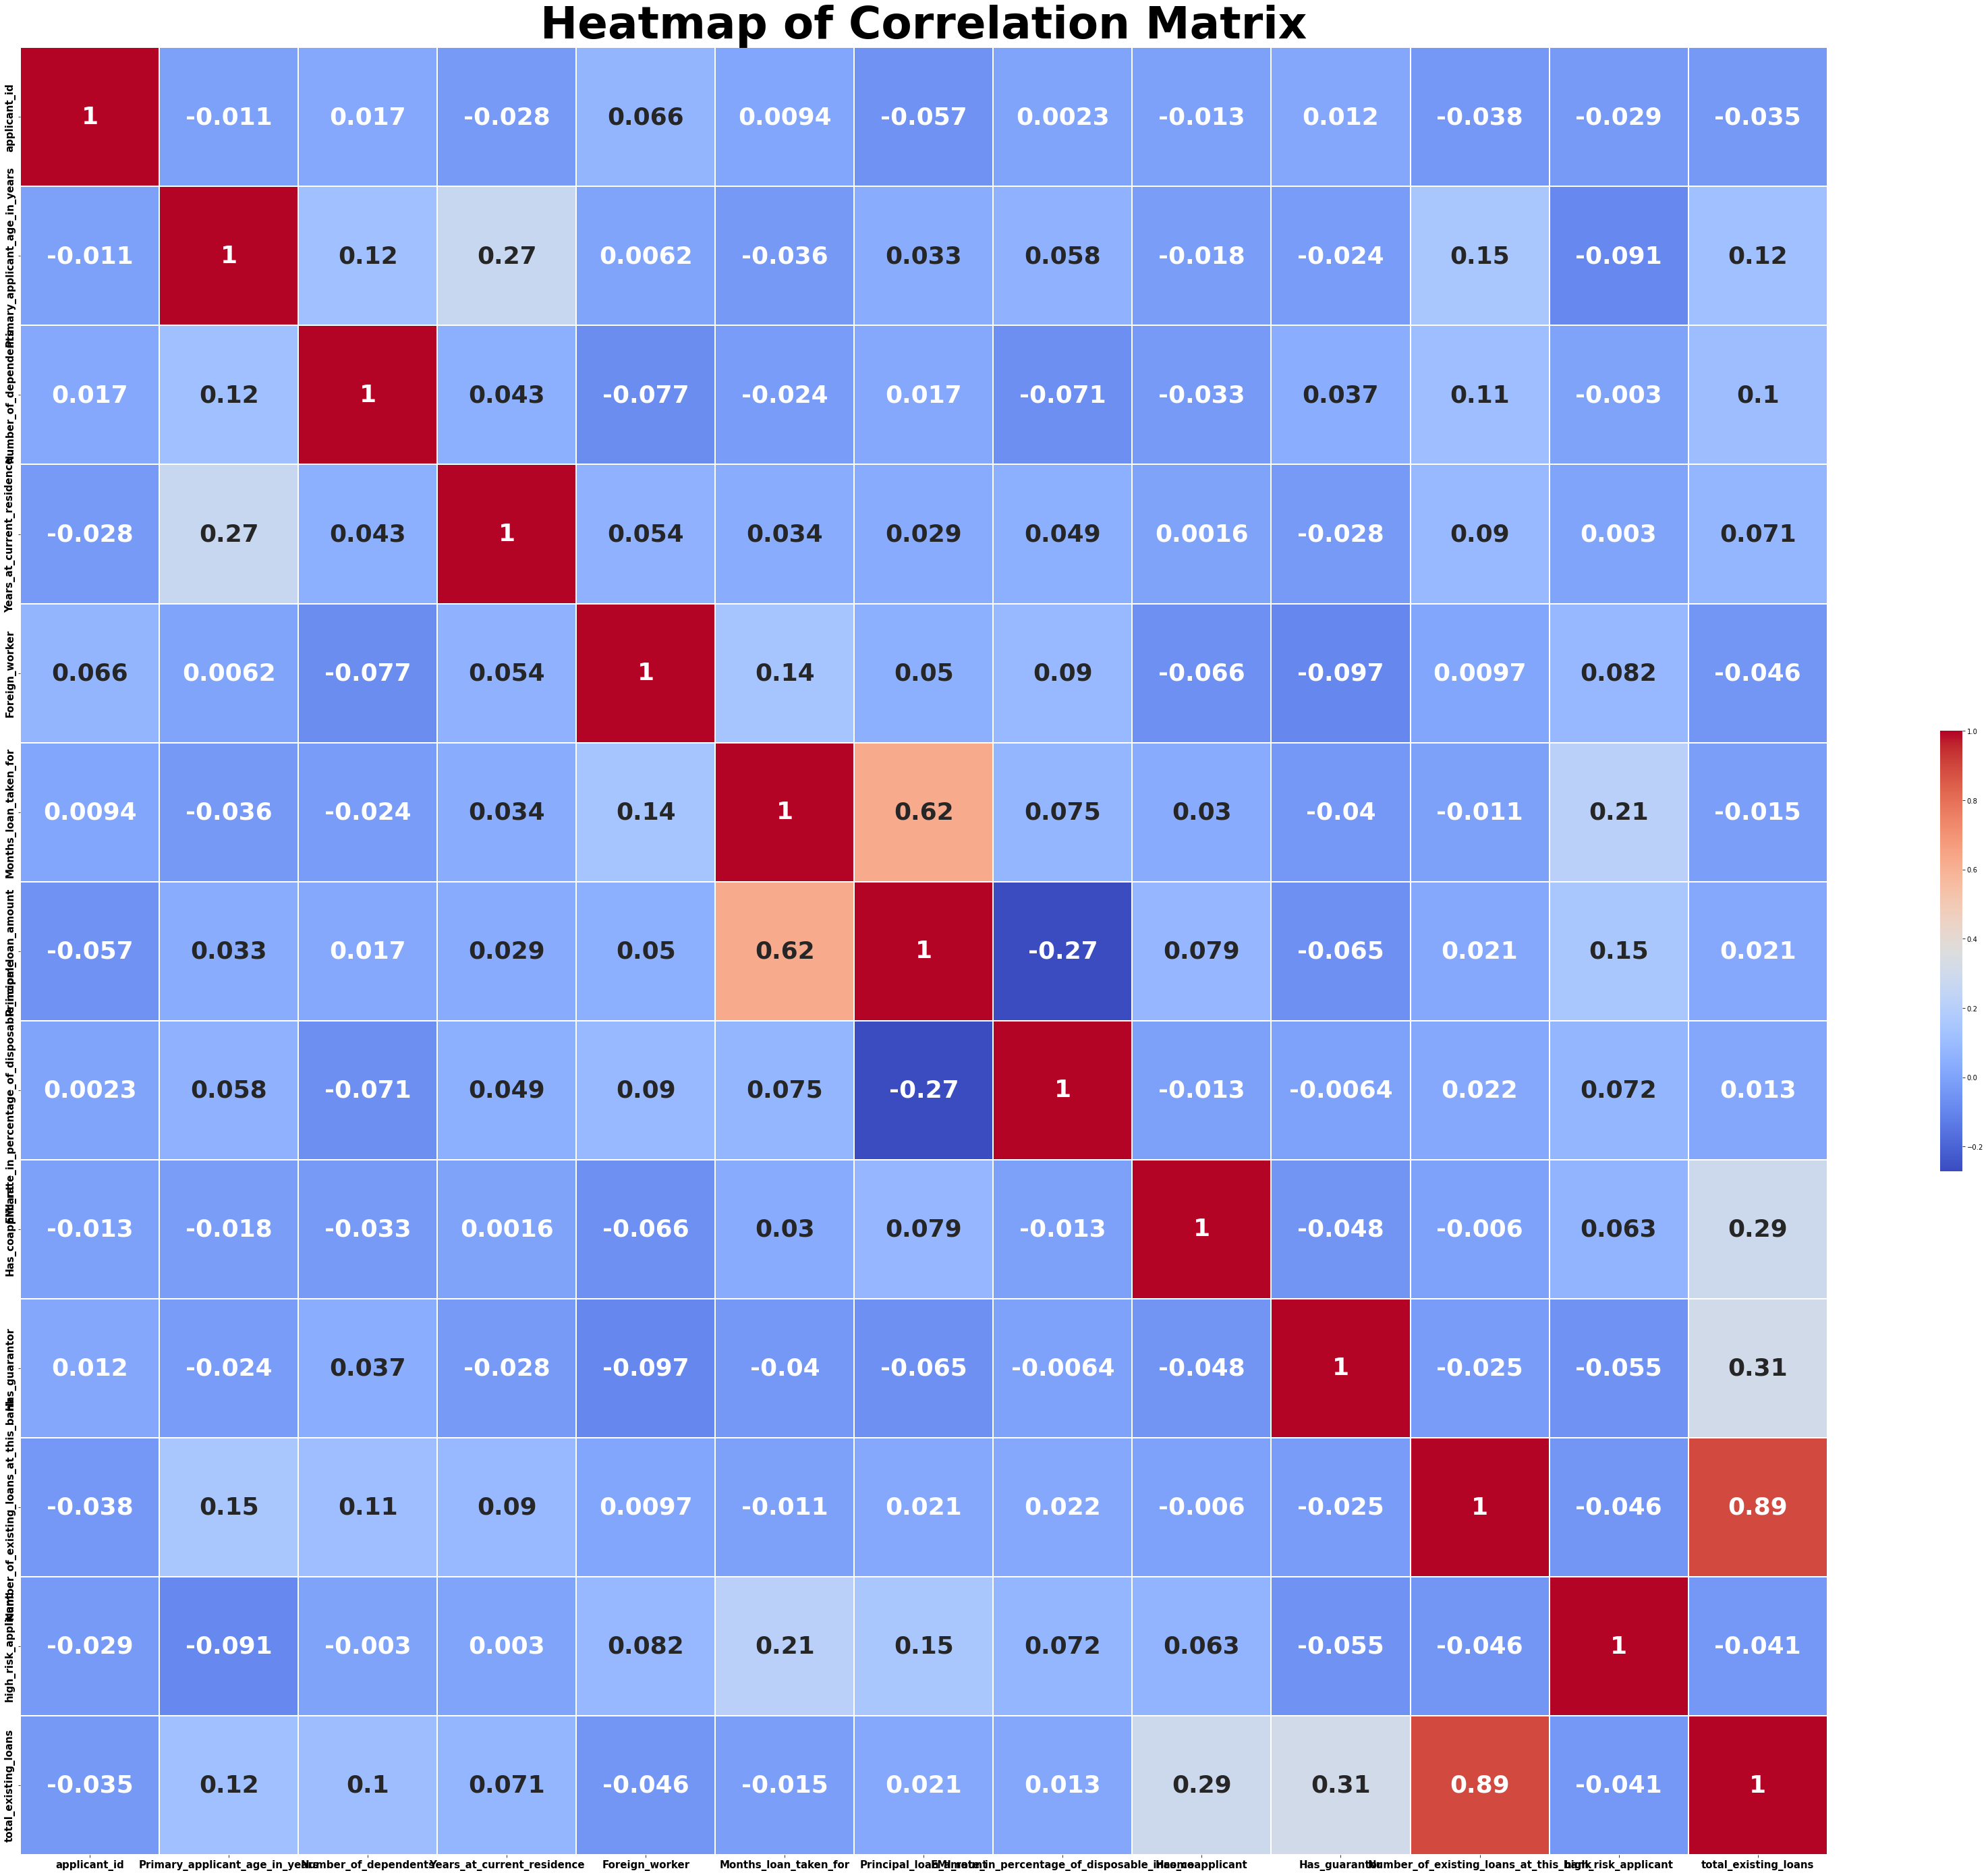

In [28]:
# Set the figure size of the plot
plt.figure(figsize=(60, 60))

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, linewidths=2, cbar_kws={"shrink": 0.2}, annot_kws={"size": 36, 'fontweight': 'bold'})

# Set the title of the plot and adjust the font size and font weight
plt.title('Heatmap of Correlation Matrix', fontsize=66, fontweight='bold')

# Adjust the font size and font weight of the x-axis and y-axis tick labels
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

# Display the plot
plt.show()

In [31]:
=# Splitting the data into input features (X) and target variable (y)
X = df.drop(columns=['high_risk_applicant'])  # Input features (excluding 'high_risk_applicant' column)
y = df['high_risk_applicant']  # Target variable ('high_risk_applicant' column)

# Splitting the data into training and testing sets
# The training set will be 80% of the data, and the testing set will be 20%
# The random_state parameter is set to 42 for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
X_train.info() # this show the details of the x train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   applicant_id                                 800 non-null    int64
 1   Primary_applicant_age_in_years               800 non-null    int64
 2   Number_of_dependents                         800 non-null    int64
 3   Years_at_current_residence                   800 non-null    int64
 4   Foreign_worker                               800 non-null    int64
 5   Months_loan_taken_for                        800 non-null    int64
 6   Principal_loan_amount                        800 non-null    int64
 7   EMI_rate_in_percentage_of_disposable_income  800 non-null    int64
 8   Has_coapplicant                              800 non-null    int64
 9   Has_guarantor                                800 non-null    int64
 10  Number_of_existing_loans_

In [33]:
# Creating a Decision Tree classifier object with a random_state of 42
clf = DecisionTreeClassifier(random_state=42)

# Fitting the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Predicting the target variable for the test data using the trained classifier
y_pred = clf.predict(X_test)

# Printing the confusion matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

# Printing the classification report
print('Classification report:\n', classification_report(y_test, y_pred))


Confusion matrix:
 [[106  35]
 [ 34  25]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       141
           1       0.42      0.42      0.42        59

    accuracy                           0.66       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.66      0.66      0.66       200



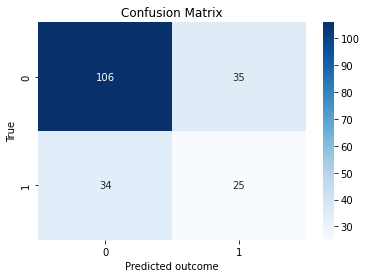

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted outcome')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
features = df[['Primary_applicant_age_in_years','Principal_loan_amount','Number_of_existing_loans_at_this_bank','high_risk_applicant']]

# Determine the number of clusters
k = 3

# Create a k-means model
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(features)

# Get the cluster assignments for each data point
clusters = kmeans.predict(features)


In [73]:
features.iloc[:,3] #this show which feature is at which location fo eg here at 3 we have high rish applicant

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: high_risk_applicant, Length: 1000, dtype: int64

In [55]:
clusters # this show a all the cluster made

array([0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0,

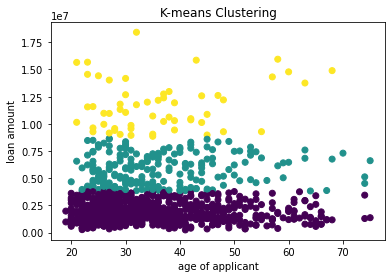

In [71]:
plt.scatter(features.iloc[:,0], features.iloc[:,1], c=clusters)

# Add labels and a title
plt.xlabel('age of applicant')
plt.ylabel('loan amount')
plt.title('K-means Clustering')

# Show the plot
plt.show()


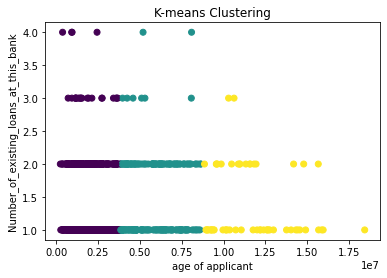

In [69]:
plt.scatter(features.iloc[:,1], features.iloc[:,2], c=clusters)

# Add labels and a title
plt.xlabel('age of applicant')
plt.ylabel('Number_of_existing_loans_at_this_bank')
plt.title('K-means Clustering')

# Show the plot
plt.show()

## 1. How would you segment customers based on their risk (of default)?
 ### To segment customers based on their risk of default, we can use a combination of loan-specific and personal attributes that are likely to influence an applicant's ability to repay the loan. Some of the attributes that can be used to segment customers are:

### Loan-specific attributes: loan amount, EMI rate, purpose of the loan, number of existing loans at this bank, loan history
### Personal attributes: age, gender, marital status, number of dependents, housing, years at current residence, employment status, savings account balance, balance in existing bank account, whether the applicant has a co-applicant or guarantor
### We can use clustering techniques to segment customers based on their risk of default. One approach could be to use k-means clustering to group customers into clusters based on their loan-specific and personal attributes. We can then assign each cluster a risk score based on the historical default rates of customers in that cluster.

## 2. Which of these segments / sub-segments would you propose be approved?

### To determine which segments/sub-segments to approve, we need to balance the risk of default with the potential revenue from each loan. We can use the cost matrix provided to estimate the cost of approving or rejecting a loan application.

### In general, we should aim to approve loan applications from segments/sub-segments with a lower risk of default and a higher potential revenue. However, we should also consider factors such as the current economic conditions, the overall risk appetite of the organization, and the specific objectives of the loan program.

## 3. What other insights can you share about the general creditworthiness of these segments?

### We can use descriptive statistics and data visualization techniques to gain insights into the general creditworthiness of each segment. For example, we can calculate the average loan amount, EMI rate, and default rate for each segment. We can also plot histograms or box plots to visualize the distribution of loan-specific and personal attributes within each segment.

### Some possible insights that we can derive from the data are:

### Customers with a higher savings account balance or balance in existing bank account tend to have a lower risk of default.
### ZCustomers with a longer employment history tend to have a lower risk of default.
### Customers with a higher number of existing loans at this bank tend to have a higher risk of default.

## 4. Tell us what your observations were on the data itself (completeness, skews) and how you would treat any anomalies (for eg - missing data)

### Before analyzing the data, we need to check for completeness, consistency, and accuracy. Some observations on the data are:

### The applicant table has 1,000 rows and 14 columns, while the loan table has 1,000 rows and 11 columns. There is a one-to-one mapping between the applicant_id in the applicant table and the applicant_id in the loan table.

### Some columns have missing data, such as Has_been_employed_for_at_least, Has_been_employed_for_at_most, and Savings_account_balance.

### Some columns have values that are not consistent with the data dictionary, such as Foreign_worker, which should be a string but has numeric values.

### Some columns have values that are skewed or have outliers, such as Months_loan_taken_for, Principal_loan_amount, and EMI_rate_in_percentage_of_disposable_income.

## To treat any anomalies in the data, we can use the following approaches:

### For missing data, we can use imputation techniques such as mean, median, or mode imputation, or use more advanced imputation techniques such as KNN imputation or multiple imputation. We need to assess the extent of missing data and the appropriateness of the imputation technique for each column.

### For columns with inconsistent data, we need to investigate the reasons for the inconsistency. If it is due to data entry errors, we can correct the errors manually. If the inconsistency is due to a change in the data format, we need to update the data dictionary accordingly.

### For skewed or outlier data, we can use normalization or standardization techniques to scale the data. We can also use techniques such as winsorization or trimming to remove outliers. We need to consider the impact of these techniques on the analysis and the interpretation of the results.

### We can also use exploratory data analysis (EDA) techniques such as visualization and statistical tests to identify anomalies and assess the quality of the data. EDA can also help us to identify relationships and patterns in the data that can guide further analysis.

### Finally, we can also use domain knowledge and expert judgment to identify and treat any anomalies in the data. It is important to involve subject matter experts in the analysis to ensure that the data is properly understood and interpreted.